In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

In [315]:
df = pd.read_csv(r"C:\Users\almal\Desktop\cleaned_data2.csv")

In [317]:
df

,team,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
1,Manchester United,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,0.000000,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
2,Manchester United,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,0.000000,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
3,Leicester City,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,0.000000,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
4,Leicester City,189.000000,33.0,31,0.000000,0.000000,0.064516,0.0,0.000000,1.483871,0.161290,2790,89,14,0,600000,3500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,Western Sydney Wanderers,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
5731,Western Sydney Wanderers,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
5732,Western Sydney Wanderers,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
5733,Western Sydney Wanderers,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [319]:
categorical_features = ['team']
numeric_features = ['height' 'age',	'appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured',
                    'award','current_value','highest_value','position_encoded',	'winger']

In [321]:
#we should delet anything with number 1
for i in categorical_features:
    print (df[i].value_counts())

team
Al-Batin FC             35
Swallows FC             35
Maritzburg United FC    35
Incheon United          34
FC Seoul                34
                        ..
Crystal Palace           2
Villarreal CF            2
Inter Milan              2
FC Barcelona             2
Leicester City           2
Name: count, Length: 356, dtype: int64


In [323]:
team_counts = df['team'].value_counts()

df = df[df['team'].isin(team_counts[team_counts >= 2].index)]

In [325]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [327]:
df.shape

(5735, 374)

In [329]:
categorical_features

['team']

In [331]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value              1.000000
highest_value              0.842171
appearance                 0.380520
minutes played             0.376898
assists                    0.209244
                             ...   
team_Swallows FC          -0.050460
team_Marumo Gallants FC   -0.050922
team_Royal AM FC          -0.051519
team_Al-Batin FC          -0.053375
goals conceded            -0.101227
Name: current_value, Length: 374, dtype: float64


In [333]:
threshold = 0.1  

selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value'],
      dtype='object')

In [335]:
selected_features = ['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'current_value',
       'highest_value']

In [337]:
df = df[selected_features]
df.head()

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,current_value,highest_value
0,34,0.000000,0.000000,0.000000,2758,47,13,0,2000000,2000000
1,39,0.129125,0.064562,0.000000,2788,0,0,1,800000,800000
2,51,0.153759,0.102506,0.000000,3512,0,0,1,800000,800000
3,65,0.000000,0.000000,1.257883,5867,0,0,0,2000000,2000000
4,31,0.000000,0.000000,1.483871,2790,89,14,0,600000,3500000


In [339]:
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [341]:
model = LinearRegression()

In [343]:
ridge_model = Ridge()  

In [345]:
lasso_model = Lasso()

In [347]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [349]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [351]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [353]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-145438.211497
goals,8542.323286
assists,21921.566155
goals conceded,-36586.110826
minutes played,232788.591125
days_injured,14177.972652
games_injured,-76932.314660
award,-50126.904756
highest_value,888290.358939


In [355]:
print(model.intercept_) 

890677.8552746294


In [357]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

AttributeError: 'Lasso' object has no attribute 'coef_'

In [359]:
y_base = [y_train.mean()] * len(y_test)

In [361]:
#Mean Square Error
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 1050112394948.8411


In [363]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 308991817670.9583
Mean Squared Error for testing: 295005122800.62585


In [365]:
#Mean_absolute_error
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 752491.718664132


In [367]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 326595.6902916024
Mean Absolute Error for testing: 320495.29830258916


In [369]:
#Root Mean Squared Error
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 867.4628053491008


In [371]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 555870.324510095
Root Mean Squared Error for testing: 543143.7404597662


In [373]:
#R Square
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7267871336300418
R Square for testing: 0.7189458419902751


In [375]:
predictions = model.predict(X_test_scaled)

In [377]:
Real_Values = np.array(y_test)

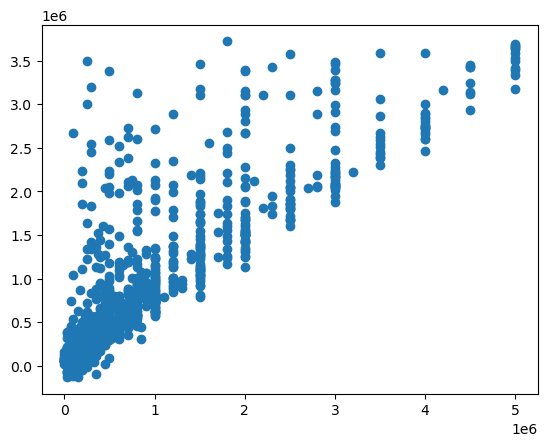

In [379]:
plt.scatter(Real_Values,predictions);

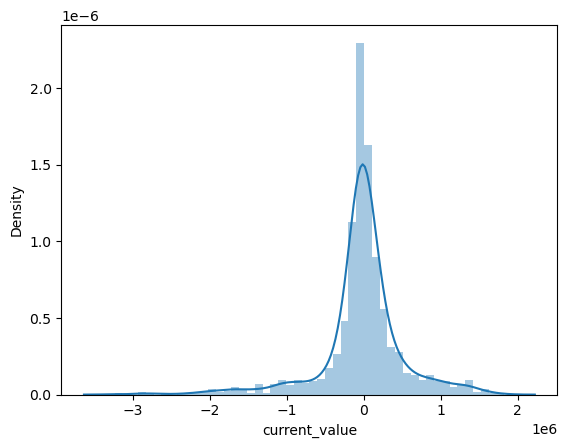

In [381]:
sns.distplot((y_test-predictions),bins=50);